In [40]:
import numpy as np
import scipy.stats as st
from scipy.linalg import inv
from scipy.optimize import minimize
import numpy.random as rnd
import matplotlib.pyplot as plt
from MARXAgents import MARXAgent

In [49]:
# Dimensions of spaces
Mu = 2
My = 2
Dy = 2
Du = 2
Dx = My*Dy + (Mu+1)*Du

# Time
Δt = 0.2
len_trial = 100
tsteps = np.arange(0, step=Δt, stop=Δt*len_trial)
len_horizon = 10;

# Prior parameters
ν0 = 100.
Ω0 = 1e0*np.diag(np.ones(Dy))
Λ0 = 1e-2*np.diag(np.ones(Dx))
M0 = 1e-8*rnd.randn(Dx,Dy)
Υ0  = 1e-2*np.diag(np.ones(Du))

# Goal prior
m_star = np.array([0.0, 0.0, 0.0])
v_star = 100. *np.array([1.0, 1.0, 1.0])
goal = st.multivariate_normal(m_star, np.diag(v_star))

# Boot up agent
agent = MARXAgent(M0, Λ0, Ω0, ν0, Υ0, goal, Dy=Dy, Du=Du, delay_inp=Mu, delay_out=My, time_horizon=len_horizon)

## Test parameter estimation

In [50]:
input = np.vstack([np.sin(tsteps), np.cos(tsteps)])
output = 2*input + 0.2*rnd.randn(2,len_trial)

preds_m = np.zeros((Dy,len_trial))
preds_v = np.zeros((Dy,len_trial))
preds_P = np.zeros((Dy,Dy,len_trial))

for t in range(1,len_trial):

    x_k = np.concatenate([agent.ubuffer.flatten(), agent.ybuffer.flatten()])
    _,preds_m[:,t],preds_P[:,:,t] = agent.posterior_predictive(x_k)
    preds_v[:,t] = np.diag(inv(preds_P[:,:,t]))
    
    agent.update(output[:,t], input[:,t-1])


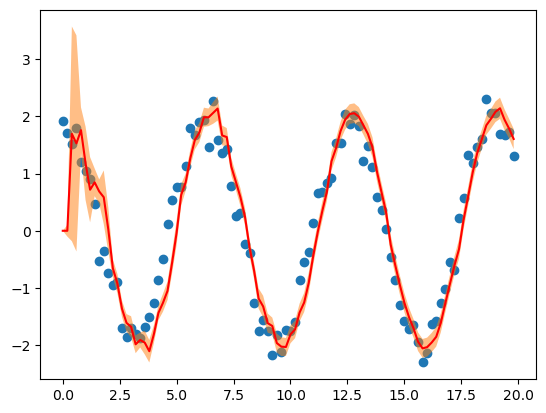

In [51]:
plt.scatter(tsteps,output[1,:], label="output")
plt.plot(tsteps, preds_m[1,:], color="red", label="predictions")
plt.fill_between(tsteps, preds_m[1,:] - np.sqrt(preds_v[1,:]), preds_m[1,:] + np.sqrt(preds_v[1,:]), alpha=0.5)

## Test action estimation

In [55]:
# Goal prior
m_star = 50*np.ones(Dy)
v_star = np.ones(Dy)
goal = st.multivariate_normal(m_star, np.diag(v_star))

len_horizon = 3

u_lims = (-100,100)

# Boot up agent
agent = MARXAgent(M0, Λ0, Ω0, ν0, Υ0, goal, Dy=Dy, Du=Du, delay_inp=Mu, delay_out=My, time_horizon=len_horizon)

In [56]:
def env(action):
    return 2*action + rnd.randn(1)

preds_m = np.zeros((Dy,len_trial))
preds_P = np.zeros((Dy,Dy,len_trial))

y_sim = np.zeros((Dy,len_trial))
u_sim = np.zeros((Du,len_trial))

policy = np.zeros((Du*len_horizon))

for k in range(1,len_trial):
    print(f"tstep = {k}/{len_trial}")

    # Predictions
    x_k = np.concatenate([agent.ubuffer.flatten(), agent.ybuffer.flatten()])
    _,preds_m[:,k],preds_P[:,:,k] = agent.posterior_predictive(x_k)

    # Interact with environment
    y_sim[:,k] = env(u_sim[:,k-1])

    # Update parameters
    agent.update(y_sim[:,k], u_sim[:,k-1])

    # Update actions
    bounds = [u_lims] * (Du*len_horizon)
    results = minimize(agent.EFE, policy, method='L-BFGS-B', bounds=bounds, options={'disp': True, 'maxiter': 100})

    # Extract minimizing control
    policy = results.x
    u_sim[:,k] = policy[:Du]

tstep = 1/100
tstep = 2/100
tstep = 3/100
tstep = 4/100
tstep = 5/100
tstep = 6/100
tstep = 7/100
tstep = 8/100
tstep = 9/100
tstep = 10/100
tstep = 11/100
tstep = 12/100
tstep = 13/100
tstep = 14/100
tstep = 15/100
tstep = 16/100
tstep = 17/100
tstep = 18/100
tstep = 19/100
tstep = 20/100
tstep = 21/100
tstep = 22/100
tstep = 23/100
tstep = 24/100
tstep = 25/100
tstep = 26/100
tstep = 27/100
tstep = 28/100
tstep = 29/100
tstep = 30/100
tstep = 31/100
tstep = 32/100
tstep = 33/100
tstep = 34/100
tstep = 35/100
tstep = 36/100
tstep = 37/100
tstep = 38/100
tstep = 39/100
tstep = 40/100
tstep = 41/100
tstep = 42/100
tstep = 43/100
tstep = 44/100
tstep = 45/100
tstep = 46/100
tstep = 47/100
tstep = 48/100
tstep = 49/100
tstep = 50/100
tstep = 51/100
tstep = 52/100
tstep = 53/100
tstep = 54/100
tstep = 55/100
tstep = 56/100
tstep = 57/100
tstep = 58/100
tstep = 59/100
tstep = 60/100
tstep = 61/100
tstep = 62/100
tstep = 63/100
tstep = 64/100
tstep = 65/100
tstep = 66/100
tstep = 67/100
tste

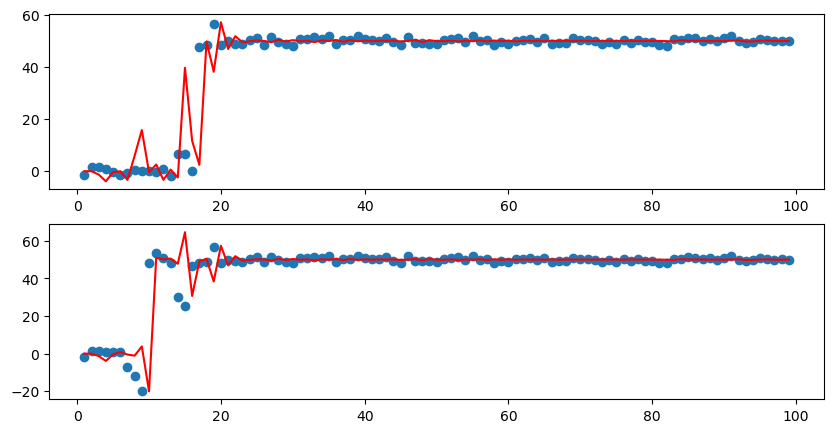

In [57]:
fig,ax = plt.subplots(2,1, figsize=(10,5))

for d in range(Dy):
    ax[d].scatter(range(1,len_trial), y_sim[d,1:])
    ax[d].plot(range(1,len_trial), preds_m[d,1:], color="red")

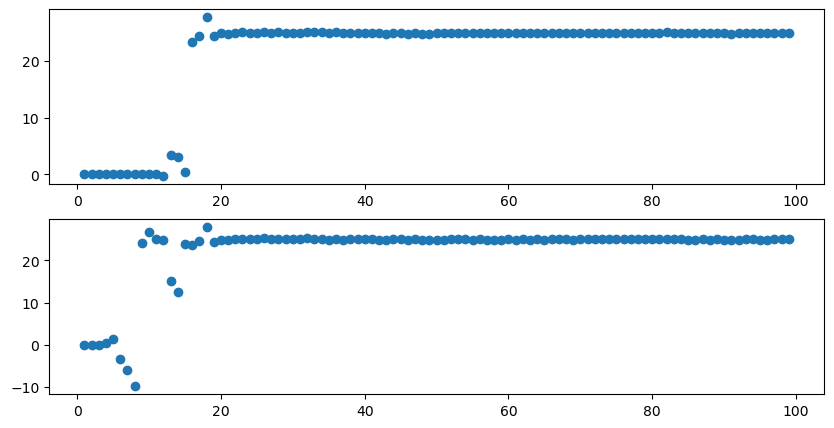

In [58]:
fig,ax = plt.subplots(2,1, figsize=(10,5))

for d in range(Du):
    ax[d].scatter(range(1,len_trial), u_sim[d,1:])